# Proyek Analisis Data: brazilian ecommerce
- **Nama:** Haldies Gerhardien Pasya
- **Email:** haldiespasya@gmail.com
- **ID Dicoding:** haldies

## Menentukan Pertanyaan Bisnis

1. kategori Produk apa yang penjualan tertinggi dan terendah?
2. Bagaimana Performa Penjualan dan Omset Perusahaan dalam Beberapa Bulan Terakhir?
3. Kategori produk mana yang menerima ulasan terbaik dan terburuk? Bagaimana perbandingan skor rata-rata antara kategori produk yang berbeda?
4. Bagaimana kinerja kategori produk yang berbeda dalam hal volume penjualan dan ulasan pelanggan?
5. Di wilayah mana kategori produk tertentu lebih populer?
6. Bagaimana perusahaan bisa mempertahankan pelanggan bernilai tinggi dan top customers agar tidak berpindah ke kompetitor?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

#### customers_dataset.csv

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


#### orders_dataset.csv

In [3]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


#### order_items_dataset.csv

In [4]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


#### products_dataset.csv

In [5]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


#### order_payments_dataset.csv

In [6]:
payments_df = pd.read_csv('data/order_payments_dataset.csv')
payments_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


#### product_category_name_translation.csv

In [7]:
products_category_translation_df = pd.read_csv('data/product_category_name_translation.csv')
products_category_translation_df.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


#### order_reviews_dataset.csv


In [8]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


**Insight :**


### Assessing Data

#### customers_dataset.csv

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [11]:
customers_df.duplicated().sum()

0

In [12]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
Missing values pada beberapa kolom:
order_approved_at: 160 missing values.
order_delivered_carrier_date: 1,783 missing values.
order_delivered_customer_date: 2,965 missing values.
Tipe data: Kolom timestamp (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) perlu dikonversi menjadi tipe datetime agar lebih mudah diolah.

#### orders_dataset.csv

In [13]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [15]:
orders_df.duplicated().sum()

0

In [16]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### order_items_dataset.csv

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [19]:
order_items_df.duplicated().sum()

0

In [20]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### order_payments_dataset.csv

In [21]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [23]:
payments_df.duplicated().sum()

0

In [24]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### products_dataset.csv

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [27]:
products_df.duplicated().sum()

0

In [28]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### product_category_name_translation.csv


In [29]:
# products_category_translation_df.info()
print(products_category_translation_df.info())
print(products_category_translation_df.isna().sum())
print(products_category_translation_df.duplicated().sum())
print(products_category_translation_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
product_category_name            0
product_category_name_english    0
dtype: int64
0
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [30]:
products_category_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [31]:
products_category_translation_df.duplicated().sum()

0

In [32]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### orders_reviews_dataset.csv


In [33]:
print(order_reviews_df.info())
print(order_reviews_df.isna().sum())
print(order_reviews_df.duplicated().sum())
print(order_reviews_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
0
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.0

In [34]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [35]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [36]:
order_reviews_df.duplicated().sum()

0

In [37]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [38]:
print(customers_df.columns)
print(orders_df.columns)
print(order_items_df.columns)
print(products_df.columns)
print(payments_df.columns)
print(products_category_translation_df.columns)
print(order_reviews_df.columns)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['product_category_name', 'product_category_name_english'], dtype='object')
Index(['review_id', 'order_id', 'revi

insight :
#### 1. Customers
- Tidak ada masalah yang perlu dibersihkan, karena tidak ada **missing values** atau **duplikasi**.
- ada	**customer_state yang tidak umum** dan  customer_city biasa menggunakan **capitalate**

#### 2. Orders
- **Missing values** pada beberapa kolom:
  - `order_approved_at`: 160 missing values.
  - `order_delivered_carrier_date`: 1,783 missing values.
  - `order_delivered_customer_date`: 2,965 missing values.
- **Tipe data**: Kolom timestamp (`order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`) perlu dikonversi menjadi tipe `datetime` agar lebih mudah diolah.

#### 3. Products
- **Missing values** pada beberapa kolom:
  - `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`: 610 missing values.
  - `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`: 2 missing values.
- **Tipe data**: Kolom `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` sebaiknya dicek kembali apakah tipe `float64` sesuai atau perlu dikonversi ke tipe lain.

#### 4. Payments
- Tidak ada masalah yang perlu dibersihkan, karena tidak ada **missing values** atau **duplikasi**.


#### 5. Categories
- Tidak ada masalah yang perlu dibersihkan, karena tidak ada **missing values** atau **duplikasi**.


### Cleaning Data

##### ubah columns customer_city jadi capitalate di customers_dataset.csv

In [39]:
def capitalate_city(city):
    return city.title()

customers_df['customer_city'] = customers_df['customer_city'].apply(capitalate_city)

customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP


#### data dapat dari https://www.drupal.org/node/2559551 untuk mengubah customer_state

In [40]:
state_mapping = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MG': 'Minas Gerais',
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina',
    'SE': 'Sergipe',
    'SP': 'São Paulo',
    'TO': 'Tocantins'
}

customers_df['customer_state'] = customers_df['customer_state'].map(state_mapping)
customers_df.head(2)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,São Paulo


#### Konversi Tipe Data dan Penanganan Nilai Hilang orders_dataset.csv

In [41]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])


orders_df = orders_df[orders_df['order_approved_at'].notna()]


orders_df = orders_df[orders_df['order_delivered_customer_date'].notna()]
orders_df = orders_df[orders_df['order_delivered_carrier_date'].notna()]


In [42]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [43]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Imputasi Nilai Hilang dan Konversi Tipe Data products_dataset.csv

In [44]:
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)

products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)




<ipython-input-44-b186b12401c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
<ipython-input-44-b186b12401c3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [45]:
print(products_df.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [46]:
# Mengonversi kolom jika diperlukan
# Misalnya, jika product_name_lenght dan lainnya seharusnya menjadi integer, kita bisa melakukan
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype(int)
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype(int)
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype(int)


In [47]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  int64  
 3   product_description_lenght  32951 non-null  int64  
 4   product_photos_qty          32951 non-null  int64  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.3+ MB


#### membersihkan data dan mengganti nama kategori produk dari product_category_name ke product_category_name_english

In [48]:
# Menggabungkan DataFrame products_df dengan products_category_translation_df
products_df = pd.merge(
    products_df,
    products_category_translation_df[['product_category_name', 'product_category_name_english']],
    on='product_category_name',
    how='left'  # menggunakan left join agar semua produk tetap ada
)

# Mengganti nama kolom product_category_name dengan product_category_name_english
products_df['product_category_name'] = products_df['product_category_name_english']

# Menghapus kolom yang tidak diperlukan
products_df.drop(columns=['product_category_name_english'], inplace=True)

In [49]:
products_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
20400,36ab622c8cb4f831132849c587ba600a,health_beauty,57,698,3,968.0,31.0,8.0,11.0
2547,64ff7191a8c0fb8fa9b42e947104d406,stationery,58,391,4,5900.0,28.0,55.0,37.0
25224,876a3339df70e1a65e56eb7715687787,sports_leisure,56,985,1,783.0,19.0,19.0,19.0
25385,b80497f4acd663733b0931af466827fc,toys,34,212,1,108.0,18.0,11.0,16.0
14190,1a909e04ddbc64bda3fc905834678201,computers_accessories,48,475,1,213.0,15.0,7.0,11.0
2654,3997a6da5a88930a92998ccbf98adf32,cool_stuff,48,671,2,9300.0,44.0,21.0,38.0
16820,ba4135f821cdef6d31f783156eaf47f7,stationery,59,153,2,1500.0,30.0,20.0,17.0
10827,8a90417eb713be09fd87a5d077ae06a2,sports_leisure,59,3949,10,500.0,20.0,10.0,15.0
6642,7aac56e58e89831fecb41998f93049ea,bed_bath_table,52,195,3,750.0,37.0,6.0,35.0
14802,696d4f2eb9788764b5872ee5a07a249d,fashion_bags_accessories,50,731,1,350.0,16.0,2.0,20.0


In [50]:
products_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### review_comment_title: Isi dengan nilai default seperti "Tidak ada judul" untuk entri yang kosong. dan review_comment_message: Isi dengan nilai default seperti "Tidak ada komentar".

In [51]:
order_reviews_df['review_comment_title'].fillna('Tidak ada', inplace=True)
order_reviews_df['review_comment_message'].fillna('Tidak ada', inplace=True)

<ipython-input-51-1e0109fbfa89>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna('Tidak ada', inplace=True)
<ipython-input-51-1e0109fbfa89>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [52]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [53]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [54]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].str.strip()
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.strip()


In [55]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [56]:
import string
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

In [57]:
order_reviews_df.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Tidak ada,tidak ada,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Tidak ada,tidak ada,2018-03-10,2018-03-11 03:05:13


## Exploratory Data Analysis (EDA)

### Menganalisis penjualan produk berdasarkan kategori.

In [58]:
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')

merged_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,housewares,40,268,4,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumery,29,178,1,400.0,19.0,13.0,19.0


In [59]:
category_sales = merged_df.groupby('product_category_name')['order_id'].count().reset_index()
category_sales.columns = ['product_category_name', 'total_orders']
category_sales

,product_category_name,total_orders
0,agro_industry_and_commerce,206
1,air_conditioning,289
2,art,197
3,arts_and_craftmanship,24
4,audio,362
...,...,...
66,stationery,2466
67,tablets_printing_image,83
68,telephony,4428
69,toys,4030


In [60]:
category_sales_sorted = category_sales.sort_values(by='total_orders', ascending=False)
print(category_sales_sorted.head(10))

    product_category_name  total_orders
7          bed_bath_table         12488
43          health_beauty          9467
65         sports_leisure          8429
39        furniture_decor          8156
15  computers_accessories          7643
49             housewares          6795
70          watches_gifts          5857
68              telephony          4428
42           garden_tools          4267
5                    auto          4139


In [61]:
print(category_sales_sorted.tail(10))

                product_category_name  total_orders
41  furniture_mattress_and_upholstery            37
23                diapers_and_hygiene            37
35                            flowers            33
46                     home_comfort_2            30
32                      fashion_sport            29
3               arts_and_craftmanship            24
52                         la_cuisine            14
11                  cds_dvds_musicals            14
29          fashion_childrens_clothes             7
61              security_and_services             2


In [62]:
customers_df['customer_state'].value_counts()

,count
customer_state,
São Paulo,41746
Rio de Janeiro,12852
Minas Gerais,11635
Rio Grande do Sul,5466
Paraná,5045
Santa Catarina,3637
Bahia,3380
Distrito Federal,2140
Espírito Santo,2033


In [63]:
customers_df['customer_city'].value_counts()

,count
customer_city,
Sao Paulo,15540
Rio De Janeiro,6882
Belo Horizonte,2773
Brasilia,2131
Curitiba,1521
...,...
Bequimao,1
Andarai,1
Vargem Grande,1


#### Melihat sales perkategori

In [64]:
merged_data = pd.merge(order_items_df, products_df, on='product_id')
merged_data = pd.merge(merged_data, order_reviews_df, on='order_id')


sales_per_category = merged_data.groupby('product_category_name').agg({
    'price': 'sum',
    'order_id': 'count',
    'review_score': 'mean'
}).reset_index()


sales_per_category.columns = ['product_category_name', 'total_sales', 'items_sold', 'average_review_score']

sales_per_category.head()

,product_category_name,total_sales,items_sold,average_review_score
0,agro_industry_and_commerce,72530.47,212,4.000000
1,air_conditioning,54330.06,292,3.969178
2,art,24037.74,207,3.937198
3,arts_and_craftmanship,1814.01,24,4.125000
4,audio,50458.71,361,3.825485


### Analisis Kinerja Bulanan Penjualan dan Omset Perusahaan

In [65]:
df_merged = orders_df.merge(customers_df, on='customer_id', how='left')

print("Statistik Deskriptif Pelanggan:")
print(df_merged[['customer_unique_id', 'customer_city', 'customer_state']].describe(include='all'))

Statistik Deskriptif Pelanggan:
                      customer_unique_id customer_city customer_state
count                              96461         96461          96461
unique                             93342          4085             27
top     8d50f5eadf50201ccdcedfb9e2ac8455     Sao Paulo      São Paulo
freq                                  15         15044          40489


**Kota Pelanggan:**

* Total Kota Berbeda: Ada 4.085 kota yang terwakili dalam data, menunjukkan jangkauan geografis yang luas.
* Kota Terpopuler: Kota yang paling banyak memiliki pelanggan adalah Sao Paulo dengan 15.044 entri. Ini menunjukkan bahwa Sao Paulo adalah pusat utama untuk basis pelanggan Anda, yang mungkin menarik untuk kegiatan pemasaran dan promosi.

**Provinsi Pelanggan:**

* Total Negara: Terdapat 27 Negara, dengan São Paulo sebagai provinsi yang paling banyak memiliki pelanggan (40.489 entri).
* Dominasi Negara: Dominasi São Paulo sebagai Negara dengan pelanggan terbanyak menunjukkan potensi besar untuk pertumbuhan di area ini, serta pentingnya mempertimbangkan strategi pemasaran yang ditargetkan di wilayah ini.

### Segmentasi customer berdasarkan RFM_score

In [66]:

df = pd.merge(orders_df, customers_df, on='customer_id')

df = pd.merge(df, payments_df[['order_id', 'payment_value']], on='order_id')

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
latest_date = df['order_purchase_timestamp'].max()
df['recency'] = (latest_date - df['order_purchase_timestamp']).dt.days


frequency_df = df.groupby('customer_unique_id').agg({'order_id': 'nunique'}).reset_index()
frequency_df.columns = ['customer_unique_id', 'frequency']


monetary_df = df.groupby('customer_unique_id').agg({'payment_value': 'sum'}).reset_index()
monetary_df.columns = ['customer_unique_id', 'monetary']


rfm_df = df[['customer_unique_id', 'recency']]
rfm_df = rfm_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rfm_df.merge(monetary_df, on='customer_unique_id')

In [67]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()


,customer_unique_id,recency,frequency,monetary,r_rank,f_rank,m_rank
0,7c396fd4830fd04220f754e42b4e5bff,331,2,82.82,28111.5,97194.0,36717.5
1,7c396fd4830fd04220f754e42b4e5bff,331,2,82.82,28111.5,97194.0,36717.5
2,7c396fd4830fd04220f754e42b4e5bff,331,2,82.82,28111.5,97194.0,36717.5
3,af07308b275d755c9edb36a90c618231,35,1,141.46,92500.5,47234.5,62471.5
4,3a653a41f6f9fc3d2a113cf8398680e8,21,1,179.12,96374.0,47234.5,73606.5


In [68]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_unique_id,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm
0,7c396fd4830fd04220f754e42b4e5bff,331,2,82.82,27.909436,96.487710,36.448148
1,7c396fd4830fd04220f754e42b4e5bff,331,2,82.82,27.909436,96.487710,36.448148
2,7c396fd4830fd04220f754e42b4e5bff,331,2,82.82,27.909436,96.487710,36.448148
3,af07308b275d755c9edb36a90c618231,35,1,141.46,91.835610,46.891256,62.013222
4,3a653a41f6f9fc3d2a113cf8398680e8,21,1,179.12,95.681268,46.891256,73.066538


In [69]:
rfm_df.describe()

,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm
count,100739.000000,100739.000000,100739.000000,100739.000000,100739.000000,100739.000000
mean,240.495905,1.076574,170.936654,50.007942,50.003971,50.000496
std,153.211715,0.373316,233.571791,28.871873,12.084199,28.867656
min,0.000000,1.000000,9.590000,0.000993,46.891256,0.001489
25%,116.000000,1.000000,64.030000,24.945892,46.891256,25.002233
50%,222.000000,1.000000,110.700000,50.000000,46.891256,49.998511
75%,351.000000,1.000000,188.935000,75.078929,46.891256,75.005708
max,695.000000,15.000000,13664.080000,100.000000,100.000000,100.000000


In [70]:

rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_unique_id,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm
99859,a3bf67d0b92528d2fe5c379dd905bf66,0,1,128.99,100.0,46.891256,57.562116
25556,44d111bdc55faca551ef91cb74a444d8,0,1,259.81,100.0,46.891256,85.176545
45842,55cfdb1ec3c5bf60d9ccc0d5f276f8a9,0,1,260.50,100.0,46.891256,85.238091
70486,6d2ca69d13c11fd702133bfc8a1310a3,0,1,111.62,100.0,46.891256,50.324601
20662,23e6a9d387ba03e2099233222d7635cf,0,1,188.13,100.0,46.891256,74.821072


In [71]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_unique_id', 'RFM_score']].head(7)

,customer_unique_id,RFM_score
0,7c396fd4830fd04220f754e42b4e5bff,2.60
1,7c396fd4830fd04220f754e42b4e5bff,2.60
2,7c396fd4830fd04220f754e42b4e5bff,2.60
3,af07308b275d755c9edb36a90c618231,3.11
4,3a653a41f6f9fc3d2a113cf8398680e8,3.46
5,7c142cf63193a1473d2e66489a9ae977,1.79
6,72632f0f9dd73dfee390c9b22eb56dd6,1.16


In [72]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_unique_id', 'RFM_score', 'customer_segment']].head(20)

,customer_unique_id,RFM_score,customer_segment
0,7c396fd4830fd04220f754e42b4e5bff,2.60,Low value customers
1,7c396fd4830fd04220f754e42b4e5bff,2.60,Low value customers
2,7c396fd4830fd04220f754e42b4e5bff,2.60,Low value customers
3,af07308b275d755c9edb36a90c618231,3.11,Medium value customer
4,3a653a41f6f9fc3d2a113cf8398680e8,3.46,Medium value customer
5,7c142cf63193a1473d2e66489a9ae977,1.79,Low value customers
6,72632f0f9dd73dfee390c9b22eb56dd6,1.16,lost customers
7,80bb27c7c16e8f973207a5086ab329e2,2.83,Low value customers
8,932afa1e708222e5821dac9cd5db4cae,1.65,Low value customers
9,39382392765b6dc74812866ee5ee92a7,0.86,lost customers


In [73]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df.head(
)

,customer_segment,customer_unique_id
0,High value customer,2493
1,Low value customers,45602
2,Medium value customer,26208
3,Top customers,438
4,lost customers,19145


## Visualization & Explanatory Analysis


### A. Pernyataan Bisnis Terait Informasi Pelanggan

#### **1: kategori Produk apa yang penjualan tertinggi dan terendah?**

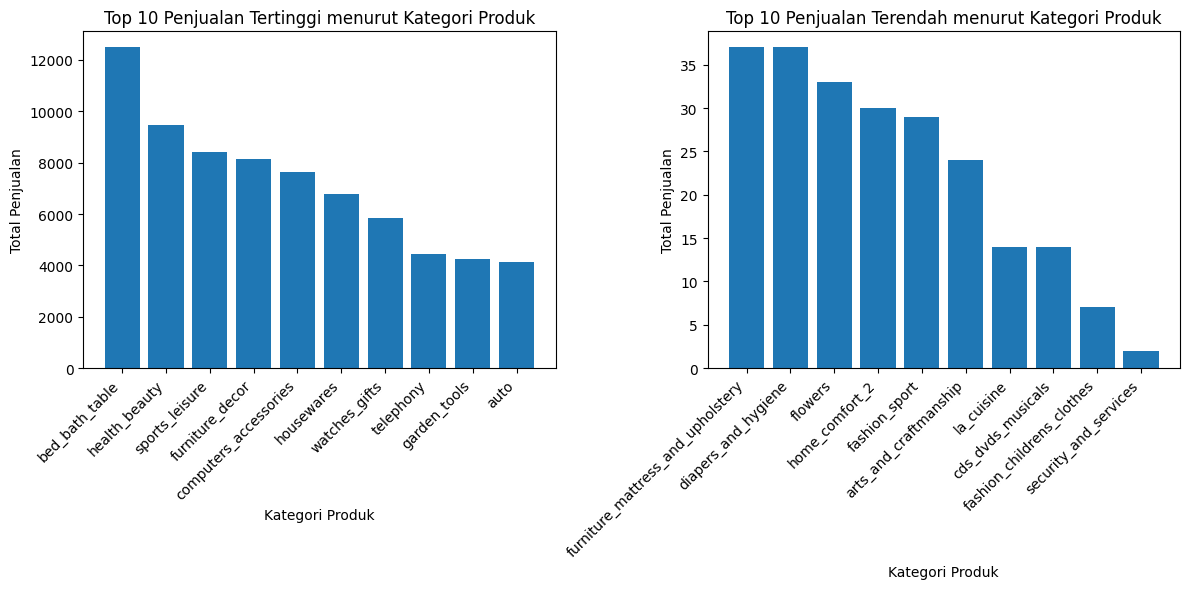

In [74]:

top_10_categories = category_sales_sorted.head(10)
bottom_10_categories = category_sales_sorted.tail(10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_10_categories['product_category_name'], top_10_categories['total_orders'])
plt.title('Top 10 Penjualan Tertinggi menurut Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(bottom_10_categories['product_category_name'], bottom_10_categories['total_orders'])
plt.title('Top 10 Penjualan Terendah menurut Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


##### 1. **Kategori Produk dengan Penjualan Tertinggi**:
- **Kategori**: *bed_bath_table*
- **Total Pesanan**: 12,488

##### 2. **Kategori Produk dengan Penjualan Terendah**:
- **Kategori**: *security_and_services*
- **Total Pesanan**: 2

Ini menunjukkan bahwa kategori *bed_bath_table* memiliki permintaan yang sangat tinggi, sementara *security_and_services* memiliki permintaan yang paling rendah.

**Kesimpulan** :

Rekomendasi strategi bisnis mencakup fokus pada kategori terlaris, seperti bed_bath_table, dengan melakukan pengembangan produk melalui penambahan variasi atau peningkatan kualitas untuk meningkatkan daya tariknya. Selain itu, luncurkan kampanye pemasaran yang agresif, memanfaatkan data penjualan tinggi untuk menarik lebih banyak pelanggan, seperti menggunakan iklan di media sosial atau kolaborasi dengan influencer. Di sisi lain, untuk kategori dengan penjualan rendah seperti security_and_services, perlu dilakukan analisis mendalam guna memahami penyebabnya, termasuk survei pelanggan untuk mendapatkan umpan balik tentang produk dan layanan. Selanjutnya, tingkatkan kualitas produk atau layanan berdasarkan umpan balik tersebut, serta lakukan perubahan atau inovasi jika produk dalam kategori ini tidak memenuhi kebutuhan konsumen.

#### **2. Bagaimana Performa Penjualan dan Omset Perusahaan dalam Beberapa Bulan Terakhir?**

In [75]:
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
sales_revenue = orders_df.groupby('purchase_month').agg(
    total_sales=('order_id', 'count'),  # Hitung jumlah pesanan
    total_revenue=('order_id', lambda x: sum(order_items_df.loc[order_items_df['order_id'].isin(x), 'price']))
).reset_index()

sales_revenue['purchase_month'] = sales_revenue['purchase_month'].dt.to_timestamp()

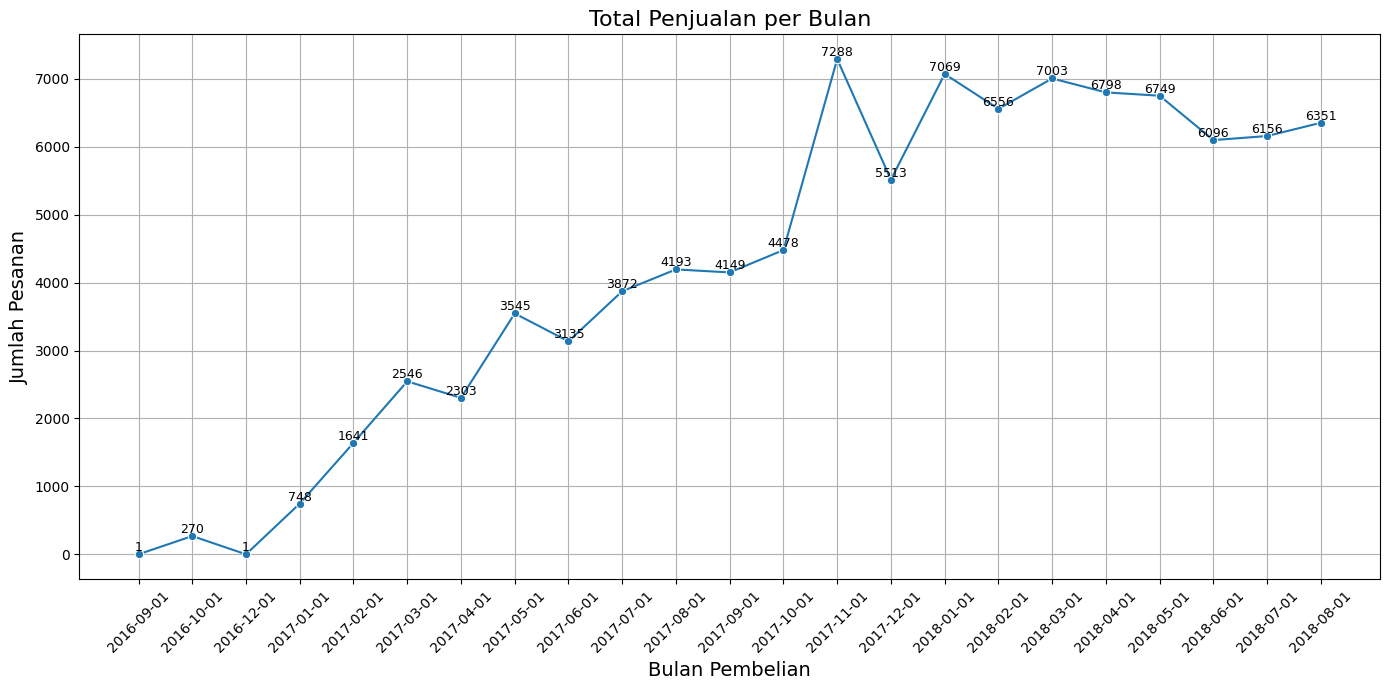

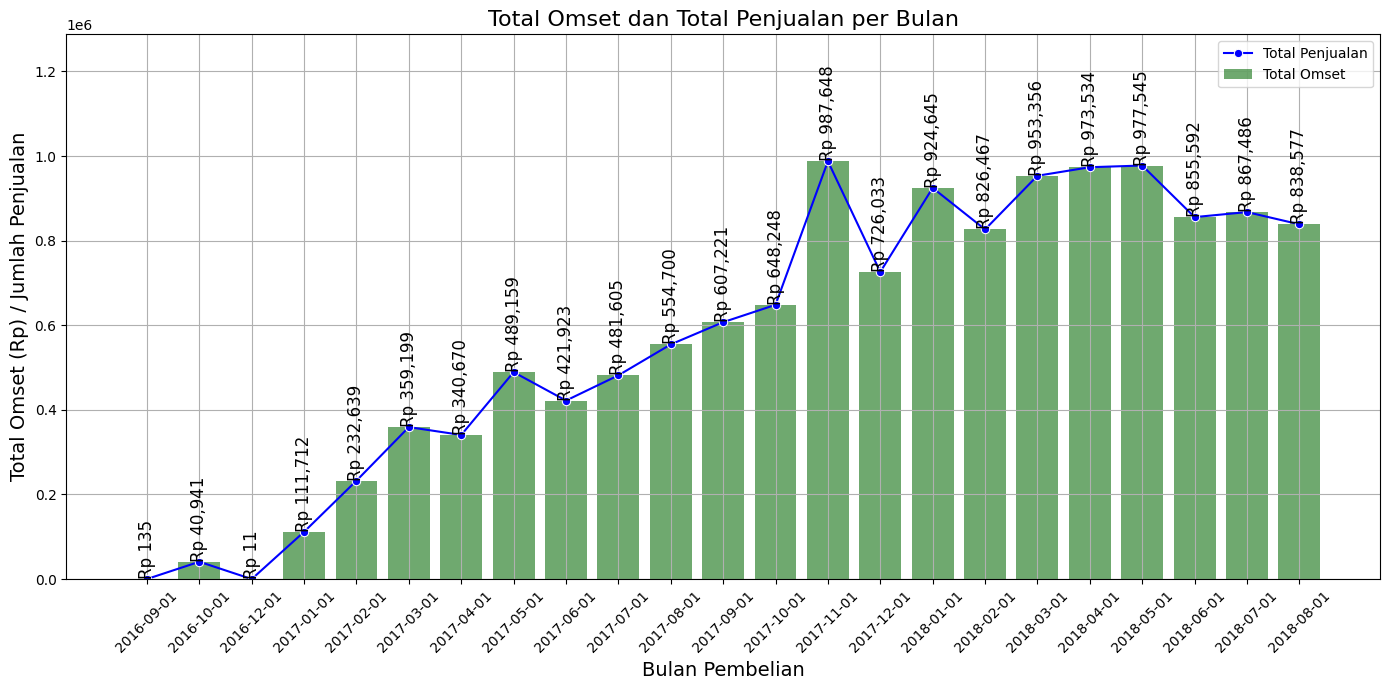

In [76]:

plt.figure(figsize=(14, 7))
plt.subplot(1, 1, 1)

sns.lineplot(x=sales_revenue['purchase_month'].astype(str), y=sales_revenue['total_sales'], marker='o')
plt.title('Total Penjualan per Bulan', fontsize=16)
plt.xlabel('Bulan Pembelian', fontsize=14)
plt.ylabel('Jumlah Pesanan', fontsize=14)


plt.grid(True)

for i in range(len(sales_revenue)):
    plt.text(x=sales_revenue['purchase_month'].astype(str)[i],
             y=sales_revenue['total_sales'].iloc[i],
             s=sales_revenue['total_sales'].iloc[i],
             ha='center',
             va='bottom',
             fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

sns.barplot(x=sales_revenue['purchase_month'].astype(str),
            y=sales_revenue['total_revenue'],
            color='green',
            alpha=0.6,
            label='Total Omset')


sns.lineplot(x=sales_revenue['purchase_month'].astype(str),
             y=sales_revenue['total_revenue'],
             marker='o',
             color='blue',
             label='Total Penjualan')


for i in range(len(sales_revenue)):
    plt.text(x=sales_revenue['purchase_month'].astype(str)[i],
             y=sales_revenue['total_revenue'].iloc[i],  # Posisi sedikit di atas batang
             s=f'Rp {sales_revenue["total_revenue"].iloc[i]:,.0f}',  # Format tanpa desimal
             ha='center',
             va='bottom',
             fontsize=12, rotation=90)


plt.title('Total Omset dan Total Penjualan per Bulan', fontsize=16)
plt.xlabel('Bulan Pembelian', fontsize=14)
plt.ylabel('Total Omset (Rp) / Jumlah Penjualan', fontsize=14)
plt.xticks(rotation=45)

plt.ylim(0, sales_revenue['total_revenue'].max() + 300000)


plt.grid(True)


plt.legend()

plt.tight_layout()
plt.show()




#### **2. Bagaimana Performa Penjualan dan Omset Perusahaan dalam Beberapa Bulan Terakhir?**

**Insight :**
##### Ringkasan Performa Penjualan dan Omset

### Total Penjualan (Jumlah Pesanan)
* **Tinggi:** 7,351 pesanan (Januari 2018)
* **Rendah:** 1 pesanan (Desember 2016)

### Omset (Pendapatan)
* **Tinggi:** Rp 1,153,393.22 (November 2017)
* **Rendah:** Rp 19.62 (Desember 2016)

### Tren Umum
* **Positif:** Terdapat peningkatan signifikan dalam penjualan dan omset dari 2016 hingga 2018.
* **Fluktuasi:** Meskipun ada fluktuasi bulanan, tren keseluruhan menunjukkan pertumbuhan yang stabil.
* **Rata-rata Meningkat:** Rata-rata penjualan dan omset meningkat dari Oktober 2016 hingga Juli 2018.

### Perbandingan Bulan Terakhir
* **Agustus 2018:**
    * Penjualan: 6,535
    * Omset: Rp 985,414.28
    * Catatan: Performa kuat, sedikit penurunan dari bulan sebelumnya.

**Kesimpulan :**

Secara keseluruhan, terdapat tren positif dalam penjualan dan omset dari 2016 hingga 2018. Peningkatan yang signifikan dalam pesanan serta omset menunjukkan bahwa perusahaan berhasil mengembangkan pangsa pasar atau meningkatkan daya tarik produk di mata pelanggan. Hal ini memberikan indikasi keberhasilan strategi penjualan dan pemasaran yang diterapkan selama periode tersebut.
Bulan-bulan dengan penjualan tinggi, seperti Januari 2018 dan November 2017, menunjukkan momentum yang baik. Bisnis harus memanfaatkan periode puncak ini dengan:

Promosi khusus dan diskon untuk meningkatkan penjualan lebih lanjut.
Pengelolaan stok yang lebih baik untuk memastikan produk selalu tersedia selama masa puncak penjualan.
Peningkatan kampanye pemasaran pada bulan-bulan tersebut untuk menarik lebih banyak pelanggan.

#### **3. Kategori produk mana yang menerima ulasan terbaik dan terburuk? Bagaimana perbandingan skor rata-rata antara kategori produk yang berbeda?**

Kategori dengan ulasan terbaik:
cds_dvds_musicals dengan skor rata-rata 4.64
fashion_childrens_clothes dengan skor rata-rata 4.50
books_general_interest dengan skor rata-rata 4.45
costruction_tools_tools dengan skor rata-rata 4.44
flowers dengan skor rata-rata 4.42

Kategori dengan ulasan terburuk:
security_and_services dengan skor rata-rata 2.50
diapers_and_hygiene dengan skor rata-rata 3.26
office_furniture dengan skor rata-rata 3.49
home_comfort_2 dengan skor rata-rata 3.63
fashion_male_clothing dengan skor rata-rata 3.64


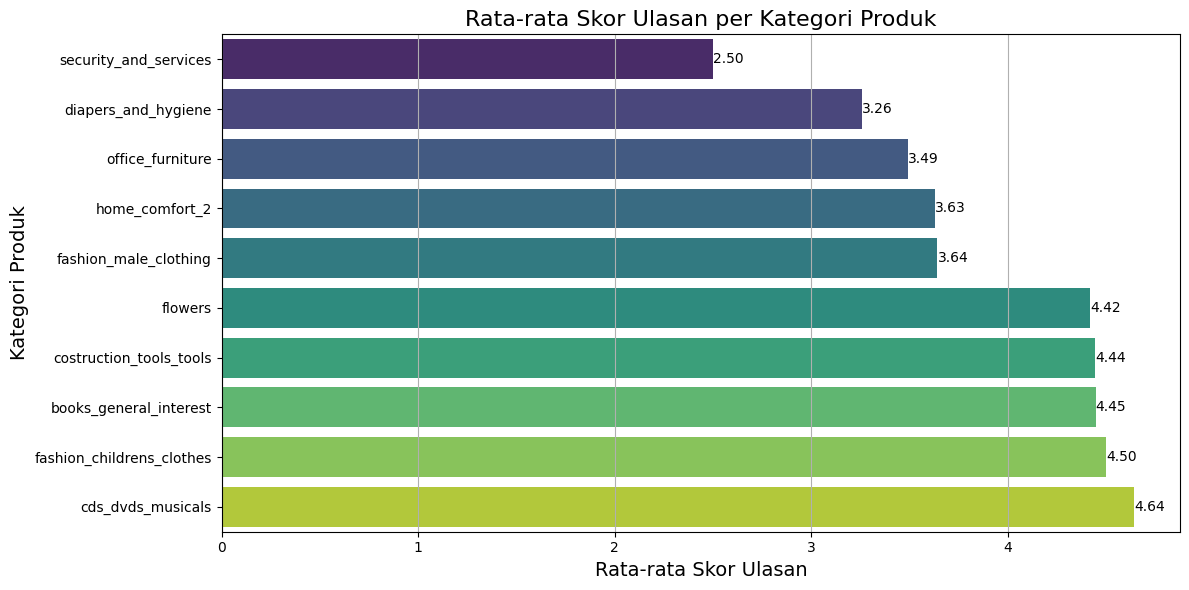

In [77]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

# Merging dataframes
merged_data = pd.merge(order_reviews_df, order_items_df, on='order_id')
merged_data = pd.merge(merged_data, products_df, on='product_id')

# Calculating average scores
average_scores = merged_data.groupby('product_category_name')['review_score'].mean().reset_index()

# Identifying best and worst categories
best_categories = average_scores.nlargest(5, 'review_score')
worst_categories = average_scores.nsmallest(5, 'review_score')

# Printing best categories
print("Kategori dengan ulasan terbaik:")
for index, row in best_categories.iterrows():
    print(f"{row['product_category_name']} dengan skor rata-rata {row['review_score']:.2f}")

# Printing worst categories
print("\nKategori dengan ulasan terburuk:")
for index, row in worst_categories.iterrows():
    print(f"{row['product_category_name']} dengan skor rata-rata {row['review_score']:.2f}")

# Combining the best and worst categories
combined_categories = pd.concat([best_categories, worst_categories])

# Plotting
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=combined_categories.sort_values('review_score'),
            x='review_score', y='product_category_name', palette='viridis')

# Adding titles and labels
plt.title('Rata-rata Skor Ulasan per Kategori Produk', fontsize=16)
plt.xlabel('Rata-rata Skor Ulasan', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.grid(axis='x')

# Annotating the bars with their respective scores
for index, value in enumerate(combined_categories.sort_values('review_score')['review_score']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()


##### **Kategori produk mana yang menerima ulasan terbaik dan terburuk? Bagaimana perbandingan skor rata-rata antara kategori produk yang berbeda?**

**Insight :**
### Analisis Ulasan Produk

### Kategori dengan Ulasan Terbaik
Kategori-kategori berikut ini secara konsisten menerima ulasan positif dari pelanggan:

* **cds_dvds_musicals:** 4.64
* **fashion_childrens_clothes:** 4.50
* **books_general_interest:** 4.45
* **costruction_tools_tools:** 4.44
* **flowers:** 4.42

Produk-produk dalam kategori ini, yang umumnya terkait dengan hiburan, pakaian anak, dan buku, tampaknya berhasil memenuhi atau bahkan melampaui ekspektasi pelanggan.

### Kategori dengan Ulasan Terburuk
Sebaliknya, kategori-kategori berikut ini memiliki skor ulasan rata-rata yang rendah:

* **security_and_services:** 2.50
* **diapers_and_hygiene:** 3.26
* **office_furniture:** 3.49
* **home_comfort_2:** 3.63
* **fashion_male_clothing:** 3.64

Skor yang rendah pada kategori seperti `security_and_services` mengindikasikan adanya masalah serius dalam kualitas produk atau layanan yang diberikan.

### Perbandingan Skor Rata-rata
* **Kategori dengan Skor Tinggi:** Kategori seperti `cds_dvds_musicals` dan `books_general_interest` cenderung memiliki produk yang mudah memenuhi ekspektasi pelanggan dari segi kualitas dan fungsionalitas.
* **Kategori dengan Skor Rendah:** Kategori seperti `security_and_services` dan `diapers_and_hygiene` mungkin mengalami masalah dalam kualitas produk, layanan pelanggan, atau ketidaksesuaian produk dengan kebutuhan konsumen.

**Kesimpulan:**

Fokus pada Peningkatan Kategori dengan Ulasan Terburuk
Kategori seperti security_and_services, diapers_and_hygiene, dan office_furniture menunjukkan skor ulasan yang rendah. Hal ini bisa menjadi indikasi adanya masalah dalam kualitas produk atau layanan pelanggan. Perusahaan harus fokus pada peningkatan kualitas produk di kategori-kategori ini serta memperbaiki pengalaman layanan pelanggan untuk menghindari penurunan reputasi dan potensi kehilangan pelanggan.



#### **4. Bagaimana kinerja kategori produk yang berbeda dalam hal volume penjualan dan ulasan pelanggan?**

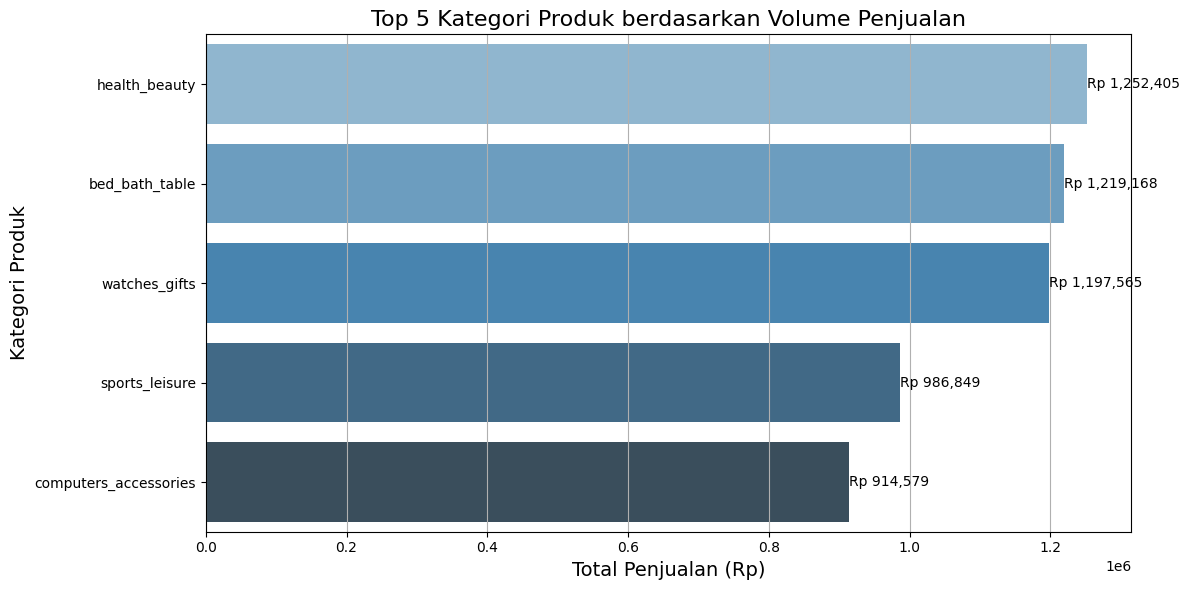

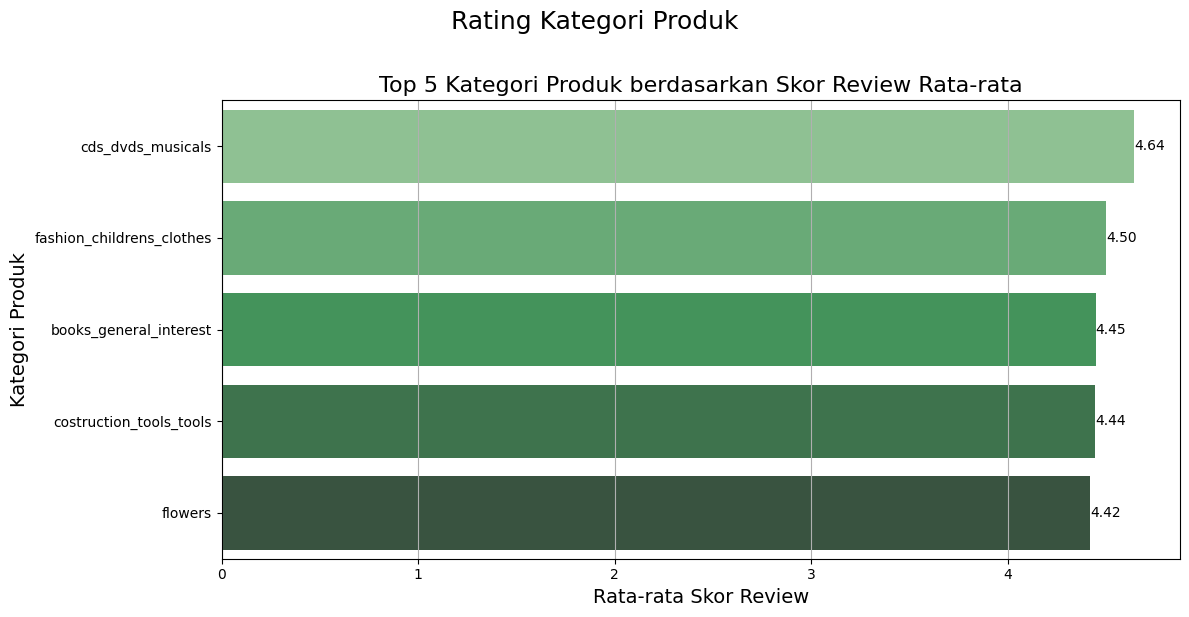

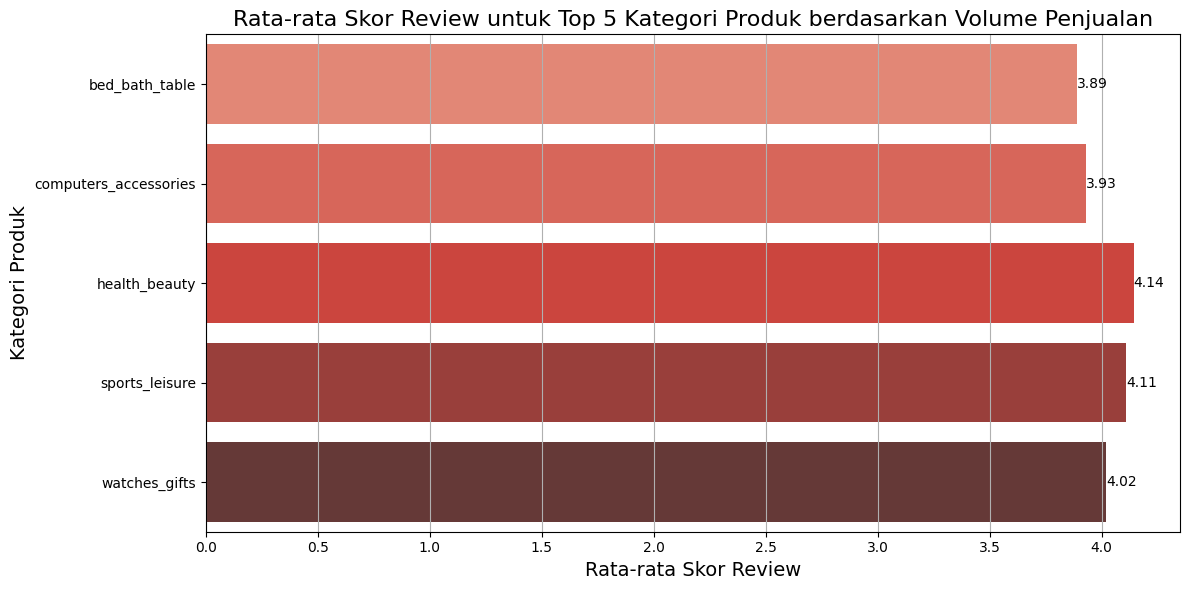

In [78]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

merged_data = pd.merge(order_items_df, products_df, on='product_id')
merged_data = pd.merge(merged_data, order_reviews_df, on='order_id')


sales_per_category = merged_data.groupby('product_category_name').agg({
    'price': 'sum',
    'order_id': 'count',
    'review_score': 'mean'
}).reset_index()


sales_per_category.columns = ['product_category_name', 'total_sales', 'items_sold', 'average_review_score']

top_sales_categories = sales_per_category.nlargest(5, 'total_sales')
top_review_categories = sales_per_category.nlargest(5, 'average_review_score')


plt.figure(figsize=(12, 6))
sales_plot = sns.barplot(data=top_sales_categories,
                         x='total_sales', y='product_category_name', palette='Blues_d')
plt.title('Top 5 Kategori Produk berdasarkan Volume Penjualan', fontsize=16)
plt.xlabel('Total Penjualan (Rp)', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.grid(axis='x')


for index, value in enumerate(top_sales_categories['total_sales']):
    sales_plot.text(value, index, f'Rp {value:,.0f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
review_plot = sns.barplot(data=top_review_categories,
                          x='average_review_score', y='product_category_name', palette='Greens_d')
plt.title('Top 5 Kategori Produk berdasarkan Skor Review Rata-rata', fontsize=16)
plt.xlabel('Rata-rata Skor Review', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.grid(axis='x')


for index, value in enumerate(top_review_categories['average_review_score']):
    review_plot.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10)

plt.suptitle('Rating Kategori Produk', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


top_sales_ratings = sales_per_category[sales_per_category['product_category_name'].isin(top_sales_categories['product_category_name'])]


plt.figure(figsize=(12, 6))
rating_plot = sns.barplot(data=top_sales_ratings,
                          x='average_review_score', y='product_category_name', palette='Reds_d')
plt.title('Rata-rata Skor Review untuk Top 5 Kategori Produk berdasarkan Volume Penjualan', fontsize=16)
plt.xlabel('Rata-rata Skor Review', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.grid(axis='x')

for index, value in enumerate(top_sales_ratings['average_review_score']):
    rating_plot.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

##### **Bagaimana kinerja kategori produk yang berbeda dalam hal volume penjualan dan ulasan pelanggan?**


**insight :**
#### Kategori produk dengan penjualan terbesar adalah:


- **health_beauty** memiliki volume penjualan terbesar, yang mengindikasikan produk-produk di kategori ini sangat diminati. Selain itu, skor ulasan yang tinggi (4.14) menunjukkan pelanggan cukup puas dengan produk ini.
- **bed_bath_table** meskipun memiliki volume penjualan yang besar, skor ulasannya sedikit lebih rendah (3.89), menunjukkan kemungkinan adanya ruang untuk perbaikan kualitas produk atau layanan.

#### Kategori Produk dengan Ulasan Terbaik
Kategori dengan skor ulasan tertinggi:

- **cds_dvds_musicals** memiliki skor ulasan tertinggi (4.64), namun penjualan produknya sangat rendah, hanya 14 unit. Ini bisa menunjukkan bahwa walaupun sedikit yang membeli, pelanggan sangat puas.
- **fashion_childrens_clothes** juga memiliki skor ulasan tinggi (4.50) meski penjualannya rendah. Produk dalam kategori ini mungkin memiliki kualitas yang baik atau memenuhi ekspektasi pelanggan.

#### **Kesimpulan:**
Kategori dengan penjualan tinggi cenderung memiliki skor ulasan yang lebih beragam. Beberapa kategori seperti health_beauty dan sports_leisure menunjukkan performa baik dalam hal penjualan maupun ulasan. Namun, kategori dengan ulasan terbaik sering kali bukanlah kategori dengan penjualan tertinggi. Produk dalam kategori ini mungkin memiliki kepuasan pelanggan yang tinggi karena kualitasnya yang baik, meskipun mereka tidak terlalu populer.

Untuk strategi bisnis, fokus dapat diarahkan pada peningkatan kualitas kategori dengan penjualan besar tetapi skor ulasan yang lebih rendah, seperti bed_bath_table. Selain itu, kategori dengan ulasan sangat baik, seperti cds_dvds_musicals, dapat lebih dipromosikan untuk meningkatkan volume penjualannya.

#### **5. Di wilayah mana kategori produk tertentu lebih populer?**

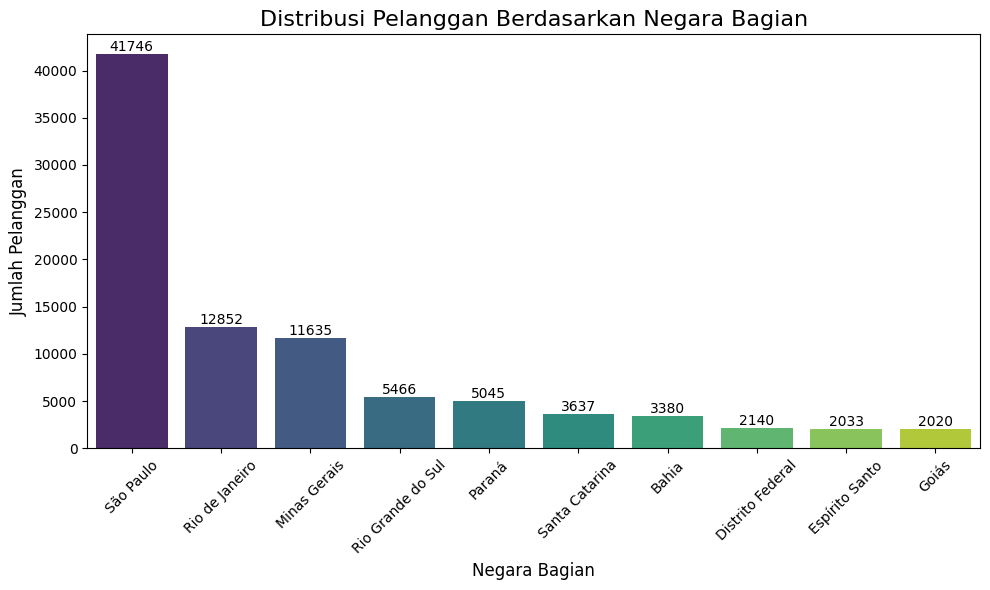

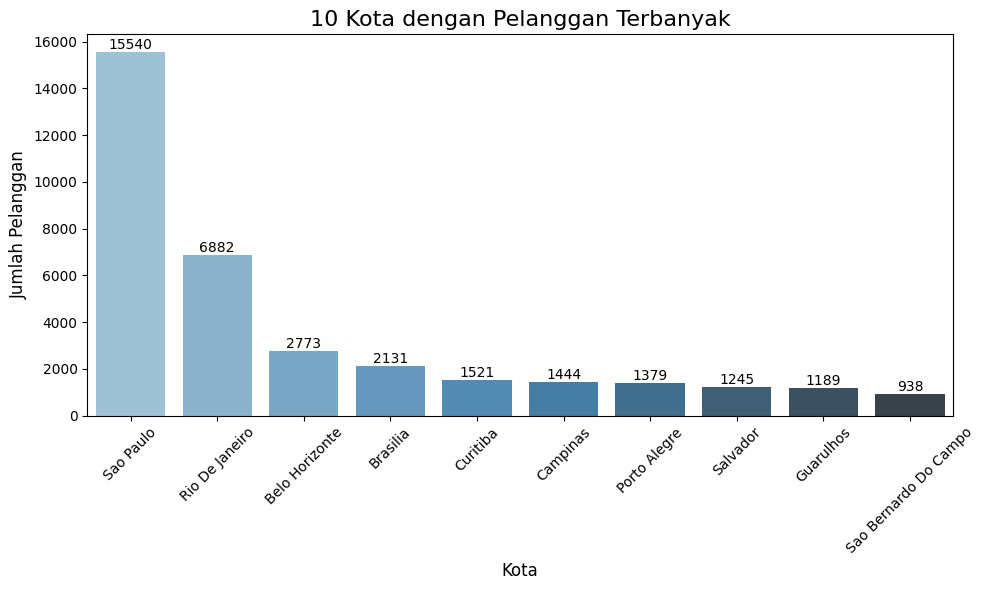

In [79]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


plt.figure(figsize=(10, 6))
state_counts = customers_df['customer_state'].value_counts().head(10)
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


plt.title('Distribusi Pelanggan Berdasarkan Negara Bagian', fontsize=16)
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)

for index, value in enumerate(state_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
city_counts = customers_df['customer_city'].value_counts().head(10)
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Blues_d')

plt.title('10 Kota dengan Pelanggan Terbanyak', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)


for index, value in enumerate(city_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


##### **5. Di wilayah mana kategori produk tertentu lebih populer?**

**insight :**
##### 10 Negara Bagian dengan Pelanggan Terbanyak:
1. São Paulo: 41,746 pelanggan
2. Rio de Janeiro: 12,852 pelanggan
3. Minas Gerais: 11,635 pelanggan
4. Rio Grande do Sul: 5,466 pelanggan
5. Paraná: 5,045 pelanggan
6. Santa Catarina: 3,637 pelanggan
7. Bahia: 3,380 pelanggan
8. Distrito Federal: 2,140 pelanggan
9. Espírito Santo: 2,033 pelanggan
10. Goiás: 2,020 pelanggan

##### 10 Kota dengan Pelanggan Terbanyak:
1. São Paulo: 15,540 pelanggan
2. Rio de Janeiro: 6,882 pelanggan
3. Belo Horizonte: 2,773 pelanggan
4. Brasília: 2,131 pelanggan
5. Curitiba: 1,521 pelanggan
6. Campinas: 1,444 pelanggan
7. Porto Alegre: 1,379 pelanggan
8. Salvador: 1,245 pelanggan
9. Guarulhos: 1,189 pelanggan
10. São Bernardo do Campo: 938 pelanggan



**Kesimpulan :**

São Paulo adalah pasar terluas dan paling beragam, sehingga peluncuran produk baru sebaiknya dilakukan di sini terlebih dahulu untuk menangkap reaksi awal dari segmen pasar yang besar. Rio de Janeiro dapat diandalkan untuk segmen pasar yang lebih fokus pada gaya hidup atau pariwisata. Wilayah selatan, yang meliputi Rio Grande do Sul, Paraná, dan Santa Catarina, cocok untuk produk-produk yang berorientasi pada sektor industri dan pertanian. Sementara itu, Brasilia bisa menjadi pusat distribusi untuk kategori produk yang lebih eksklusif atau khusus.


#### **6. Bagaimana perusahaan bisa mempertahankan pelanggan bernilai tinggi dan top customers agar tidak berpindah ke kompetitor?**




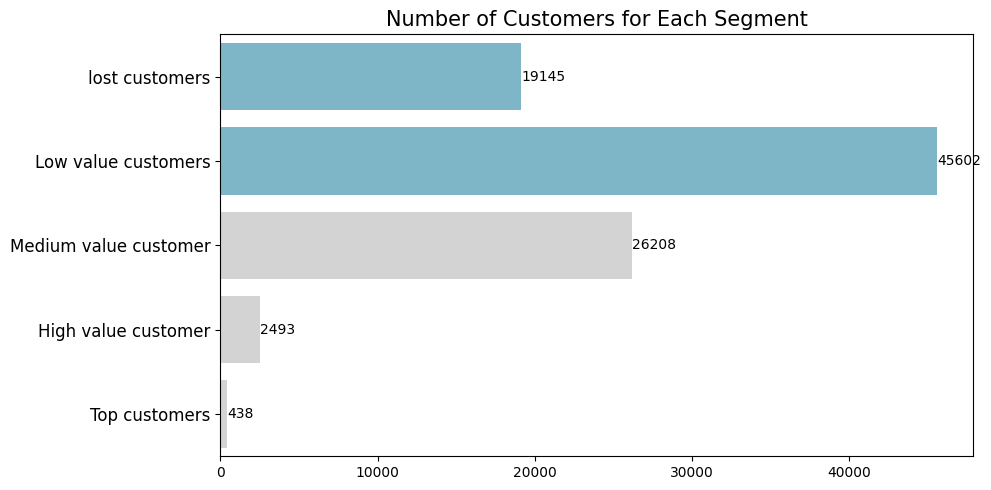

In [80]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df.head(
)
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])


sorted_customer_segment_df = customer_segment_df.sort_values(by="customer_unique_id", ascending=False)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

bar_plot = sns.barplot(
    x="customer_unique_id",
    y="customer_segment",
    data=sorted_customer_segment_df,
    palette=colors_
)


plt.title("Number of Customers for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)


for bar in bar_plot.patches:
    bar_plot.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center', ha='left', fontsize=10
    )

plt.tight_layout()
plt.show()


#### **6. Berapa banyak pelanggan yang termasuk dalam kategori 'High value customers' dan 'Lost customers'? Selain itu, bagaimana perusahaan dapat mempertahankan pelanggan bernilai tinggi dan 'Top customers' dan High value customer agar tidak berpindah ke kompetitor?**

**insight :**

Perusahaan memiliki segmentasi pelanggan yang beragam, mencakup berbagai tingkatan nilai. Di puncak piramida pelanggan, **terdapat 438 pelanggan top** yang merupakan aset paling berharga bagi perusahaan. Tepat di bawahnya, **perusahaan memiliki 2.493 pelanggan bernilai tinggi** yang juga memberikan kontribusi signifikan terhadap pendapatan. Namun, perusahaan juga menghadapi tantangan dengan adanya **19.145 pelanggan yang dikategorikan sebagai "Lost customers"** atau pelanggan yang telah berhenti menggunakan produk atau layanan perusahaan. Selain itu, terdapat sejumlah pelanggan bernilai rendah

**kesimpulan**
Perusahaan dapat mempertahankan pelanggan bernilai tinggi dan **top customers 2.493 dan High value customer 438 dengan meningkatkan personalisasi layanan**, memberikan penghargaan melalui program loyalitas eksklusif, menawarkan pengalaman pelanggan yang superior, serta menangani keluhan dengan cepat dan efektif. Fokus pada hubungan jangka panjang dan penawaran yang disesuaikan akan mendorong loyalitas mereka dan mencegah mereka berpindah ke kompetitor.

## Analisis Lanjutan (Opsional)

### Conclusion

**1. kategori Produk apa yang penjualan tertinggi dan terendah?**


**Conclusion** :

Rekomendasi strategi bisnis mencakup fokus pada kategori terlaris, seperti bed_bath_table, dengan melakukan pengembangan produk melalui penambahan variasi atau peningkatan kualitas untuk meningkatkan daya tariknya. Selain itu, luncurkan kampanye pemasaran yang agresif, memanfaatkan data penjualan tinggi untuk menarik lebih banyak pelanggan, seperti menggunakan iklan di media sosial atau kolaborasi dengan influencer. Di sisi lain, untuk kategori dengan penjualan rendah seperti security_and_services, perlu dilakukan analisis mendalam guna memahami penyebabnya, termasuk survei pelanggan untuk mendapatkan umpan balik tentang produk dan layanan. Selanjutnya, tingkatkan kualitas produk atau layanan berdasarkan umpan balik tersebut, serta lakukan perubahan atau inovasi jika produk dalam kategori ini tidak memenuhi kebutuhan konsumen.

[teks link](https://)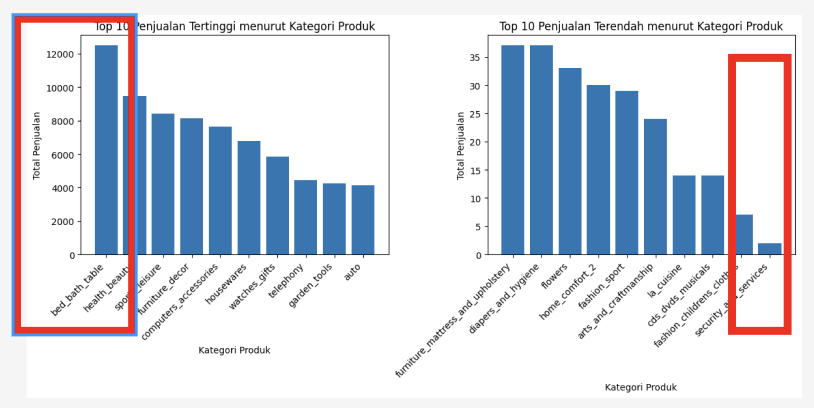

**2. Bagaimana Performa Penjualan dan Omset Perusahaan dalam Beberapa Bulan Terakhir?**
teks tebal

**Conclusion**

Secara keseluruhan, terdapat tren positif dalam penjualan dan omset dari 2016 hingga 2018. Peningkatan yang signifikan dalam pesanan serta omset menunjukkan bahwa perusahaan berhasil mengembangkan pangsa pasar atau meningkatkan daya tarik produk di mata pelanggan. Hal ini memberikan indikasi keberhasilan strategi penjualan dan pemasaran yang diterapkan selama periode tersebut.
Bulan-bulan dengan penjualan tinggi, seperti Januari 2018 dan November 2017, menunjukkan momentum yang baik. Bisnis harus memanfaatkan periode puncak ini dengan:

Promosi khusus dan diskon untuk meningkatkan penjualan lebih lanjut.
Pengelolaan stok yang lebih baik untuk memastikan produk selalu tersedia selama masa puncak penjualan.
Peningkatan kampanye pemasaran pada bulan-bulan tersebut untuk menarik lebih banyak pelanggan.

**3. Kategori produk mana yang menerima ulasan terbaik dan terburuk? Bagaimana perbandingan skor rata-rata antara kategori produk yang berbeda?**


**Conclusion**

Fokus pada Peningkatan Kategori dengan Ulasan Terburuk
Kategori seperti **security_and_services dengan score 2.50** dan  **diapers_and_hygiene dengan score 3.26** menunjukkan skor ulasan yang rendah. Hal ini bisa menjadi indikasi adanya masalah dalam kualitas produk atau layanan pelanggan. Perusahaan harus fokus pada peningkatan kualitas produk di kategori-kategori ini serta memperbaiki pengalaman layanan pelanggan untuk menghindari penurunan reputasi dan potensi kehilangan pelanggan.


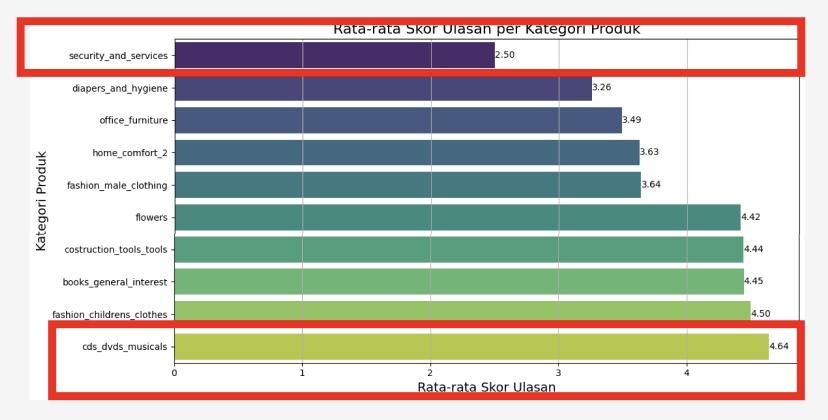

**4. Bagaimana kinerja kategori produk yang berbeda dalam hal volume penjualan dan ulasan pelanggan?**

**Conclusion**

Kategori dengan penjualan tinggi cenderung memiliki skor ulasan yang lebih beragam. Beberapa kategori seperti health_beauty dan sports_leisure menunjukkan performa baik dalam hal penjualan maupun ulasan. Namun, kategori dengan ulasan terbaik sering kali bukanlah kategori dengan penjualan tertinggi. Produk dalam kategori ini mungkin memiliki kepuasan pelanggan yang tinggi karena kualitasnya yang baik, meskipun mereka tidak terlalu populer.

Untuk strategi bisnis, fokus dapat diarahkan pada peningkatan kualitas kategori dengan penjualan besar tetapi skor ulasan yang lebih rendah, seperti bed_bath_table. Selain itu, kategori dengan ulasan sangat baik, seperti cds_dvds_musicals, dapat lebih dipromosikan untuk meningkatkan volume penjualannya.

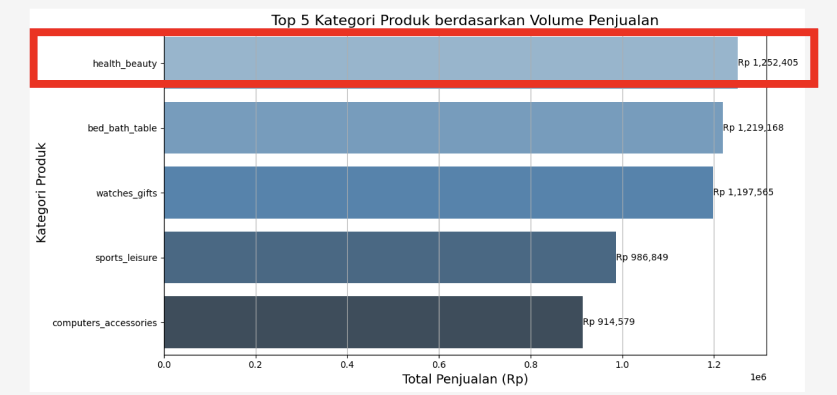

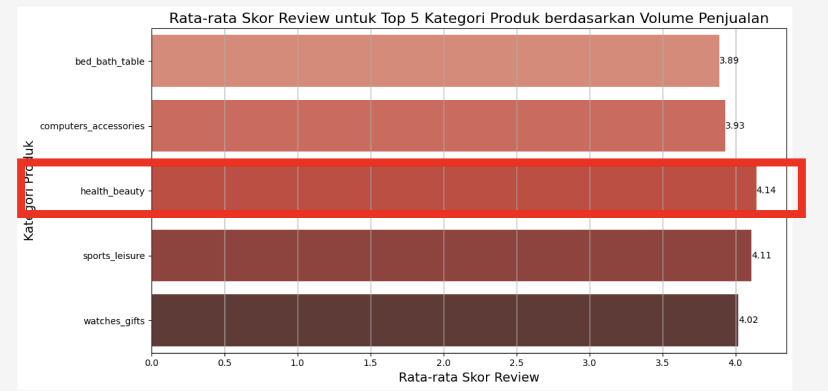

**5. Di wilayah mana kategori produk tertentu lebih populer?**

**Conclusion**

São Paulo adalah pasar terluas dan paling beragam, sehingga peluncuran produk baru sebaiknya dilakukan di sini terlebih dahulu untuk menangkap reaksi awal dari segmen pasar yang besar. Rio de Janeiro dapat diandalkan untuk segmen pasar yang lebih fokus pada gaya hidup atau pariwisata. Wilayah selatan, yang meliputi Rio Grande do Sul, Paraná, dan Santa Catarina, cocok untuk produk-produk yang berorientasi pada sektor industri dan pertanian. Sementara itu, Brasilia bisa menjadi pusat distribusi untuk kategori produk yang lebih eksklusif atau khusus.

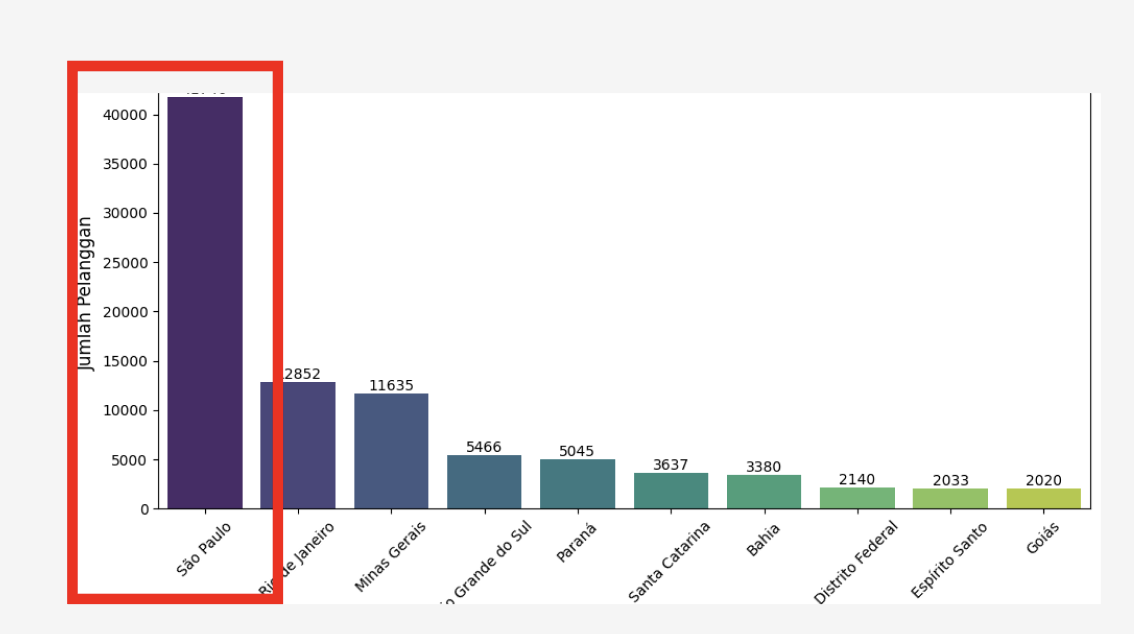

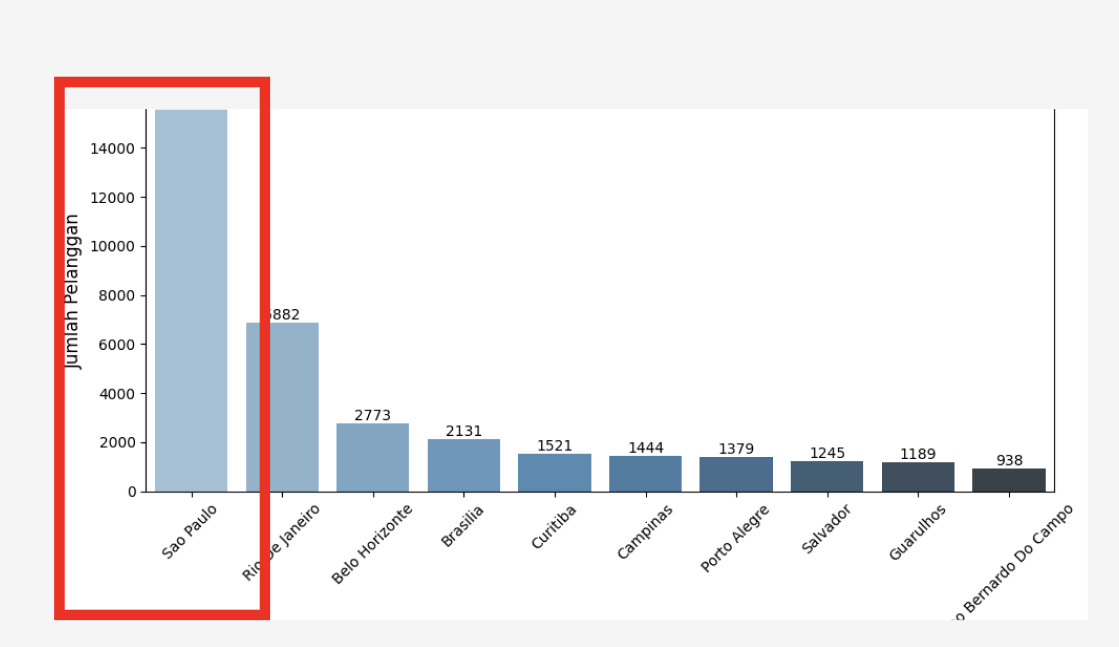

##### **6. Berapa banyak pelanggan yang termasuk dalam kategori 'High value customers' dan 'Lost customers'? Selain itu, bagaimana perusahaan dapat mempertahankan pelanggan bernilai tinggi dan 'Top customers' dan High value customer agar tidak berpindah ke kompetitor?**


## **Conclusion**
Perusahaan dapat mempertahankan pelanggan bernilai tinggi dan **top customers 2.493 dan High value customer 438 dengan meningkatkan personalisasi layanan**, memberikan penghargaan melalui program loyalitas eksklusif, menawarkan pengalaman pelanggan yang superior, serta menangani keluhan dengan cepat dan efektif. Fokus pada hubungan jangka panjang dan penawaran yang disesuaikan akan mendorong loyalitas mereka dan mencegah mereka berpindah ke kompetitor.

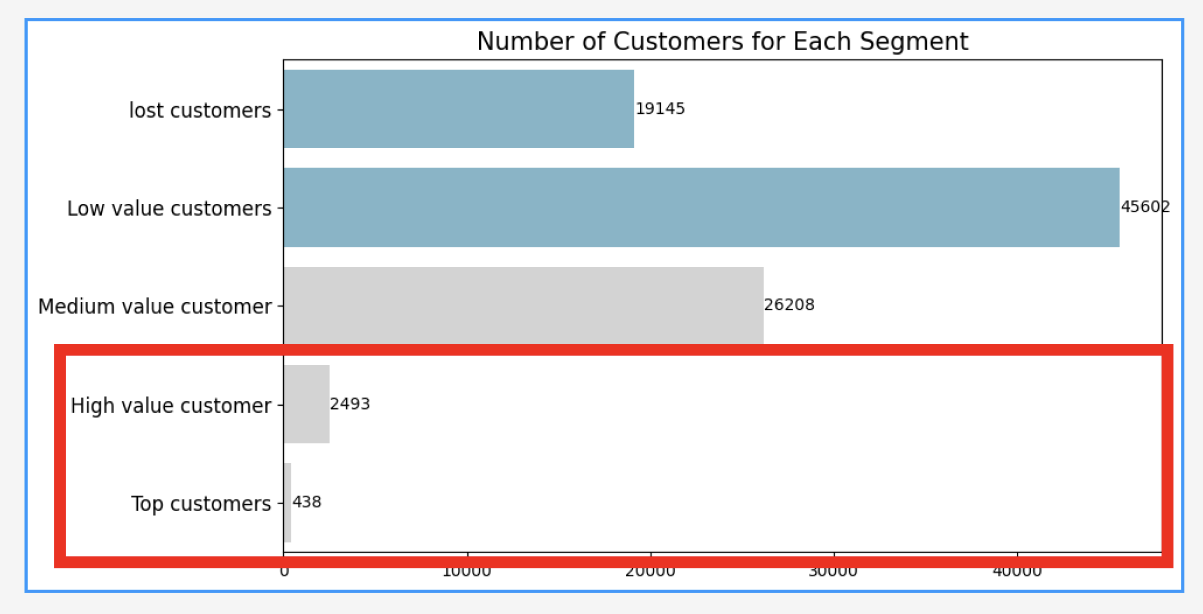